1. Import the Dataset and Initial Analysis

a. Data Types of All Columns

In [ ]:
! gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 57.4MB/s]


In [ ]:
import pandas as pd



data = pd.read_csv('/content/walmart_data.csv')
data.dtypes


User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


b. Number of Rows and Columns

In [ ]:
data.shape

(550068, 10)

In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

c. Check for Missing Values

In [ ]:
missing_values = data.isnull().sum()
missing_values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

* Columns are a mix of integers and objects (strings).
* The dataset has 550,068 rows and 10 column.
* There are no missing values in the dataset.

2. Detect Null Values and Outliers

a. Detect Null Values and Outliers

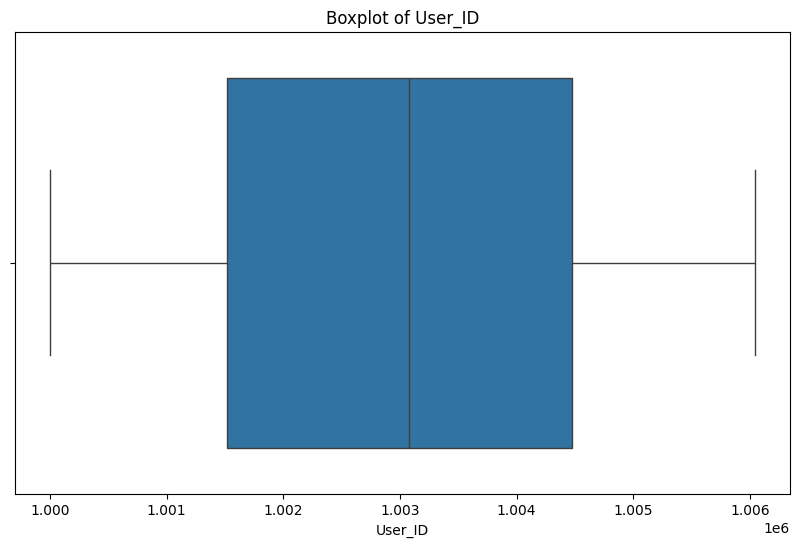

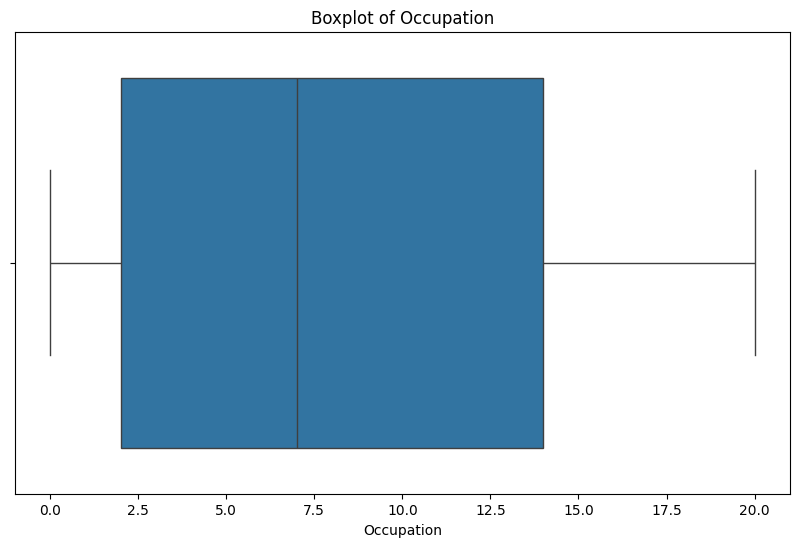

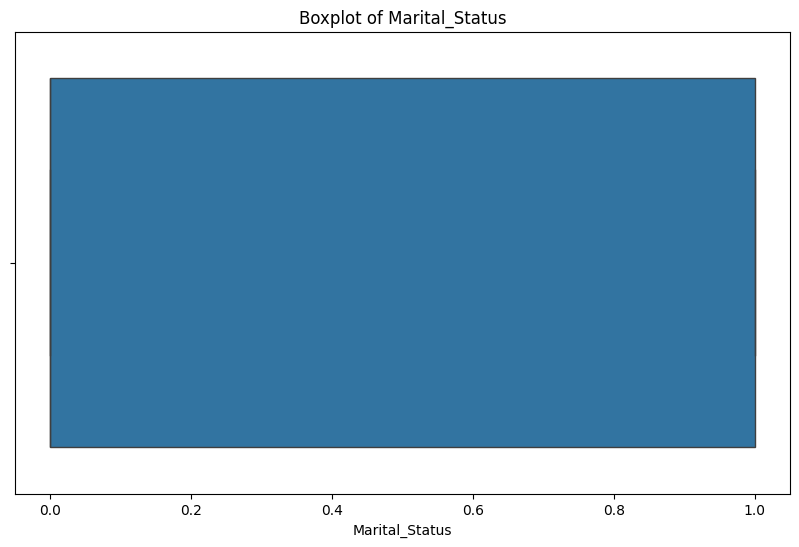

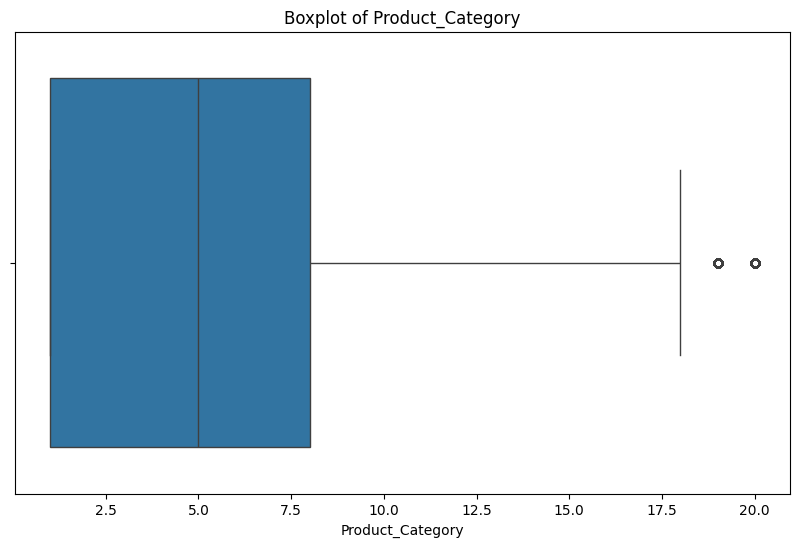

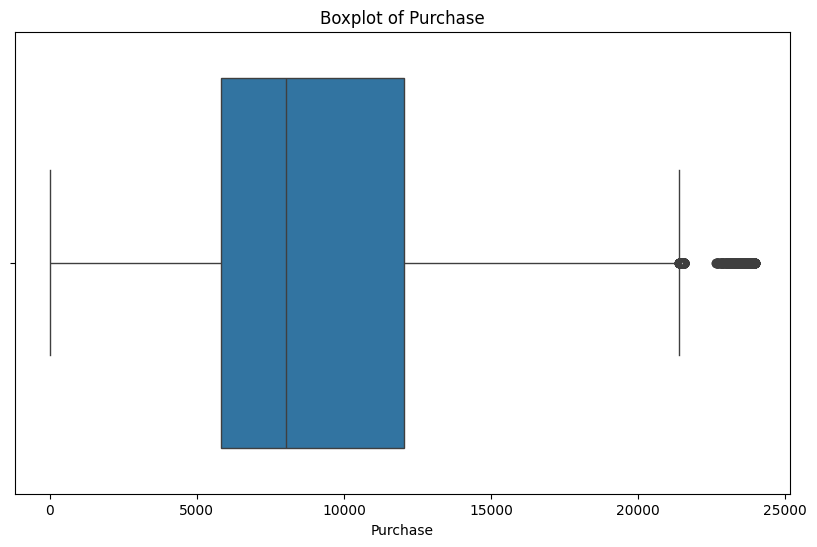

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_vars = data.select_dtypes(include=['float64', 'int64']).columns

for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[var])
    plt.title(f'Boxplot of {var}')
    plt.show()


The boxplots for the continuous variables reveal potential outliers in the data:

1. Occupation:
There are some outliers, especially towards the higher occupation codes.
2. Product_Category:
There are visible outliers in product categories, particularly towards the higher values.
3. Purchase:
Significant number of outliers on the higher end of purchase amounts.

b. Remove/Clip the Data Between the 5th Percentile and 95th Percentile

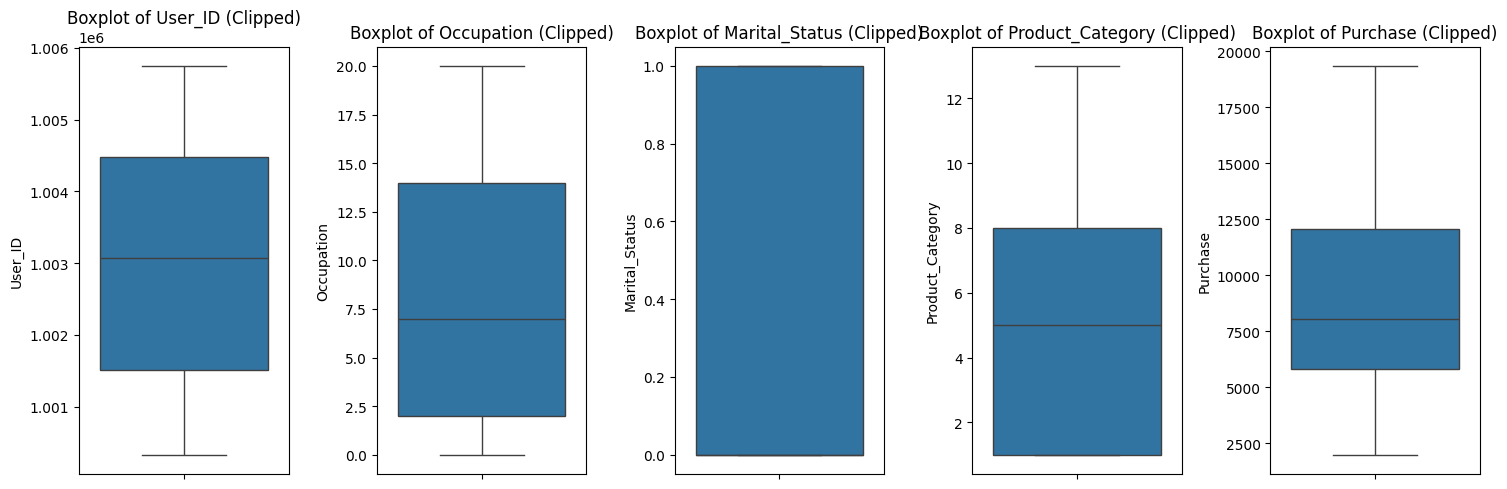

In [ ]:
import numpy as np


def clip_outliers(df, columns):
    for column in columns:
        lower_bound = np.percentile(df[column], 5)
        upper_bound = np.percentile(df[column], 95)
        df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

data_clipped = clip_outliers(data.copy(), continuous_vars)


plt.figure(figsize=(15, 5))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(1, len(continuous_vars), i)
    sns.boxplot(data_clipped[var])
    plt.title(f'Boxplot of {var} (Clipped)')
plt.tight_layout()
plt.show()



Clipping reduces the impact of extreme values (outliers), making the data more robust for analysis.

3. Data Exploration

a. Products Bought by Different Age Groups

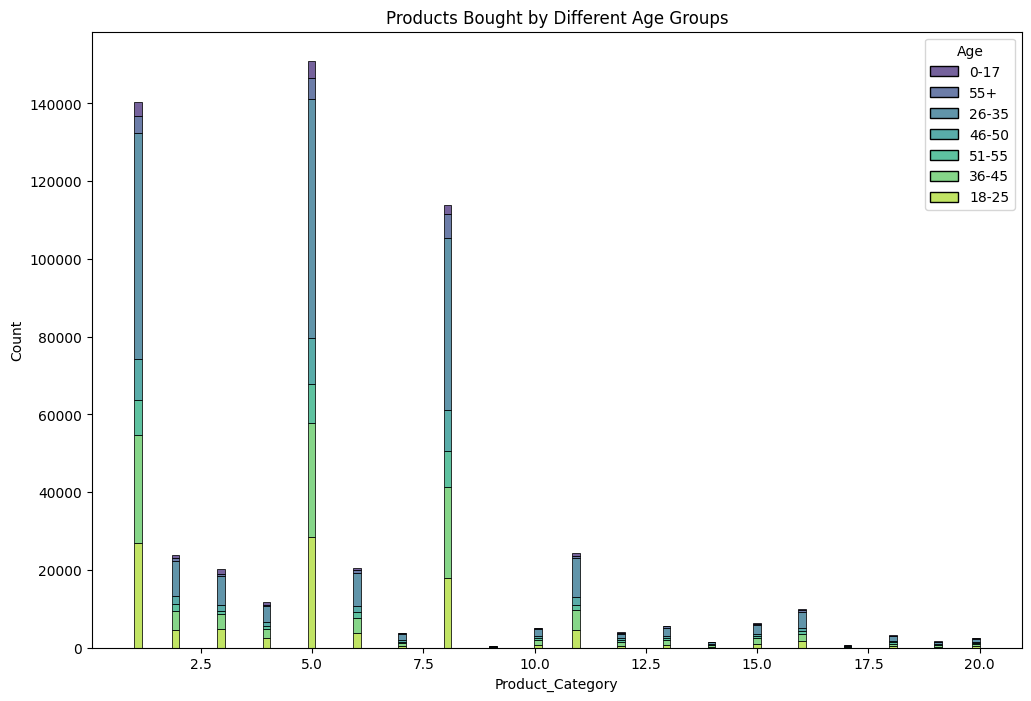

In [ ]:

plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Product_Category', hue='Age', multiple='stack', palette='viridis')
plt.title('Products Bought by Different Age Groups')
plt.show()


This visualization shows which products are popular among various age groups, helping to identify target demographics for specific products.

b. Relationship Between Age, Marital Status, and Amount Spent

In [ ]:
data['Marital_Status'] = data['Marital_Status'].astype('category')
data['Age'] = data['Age'].astype('category')


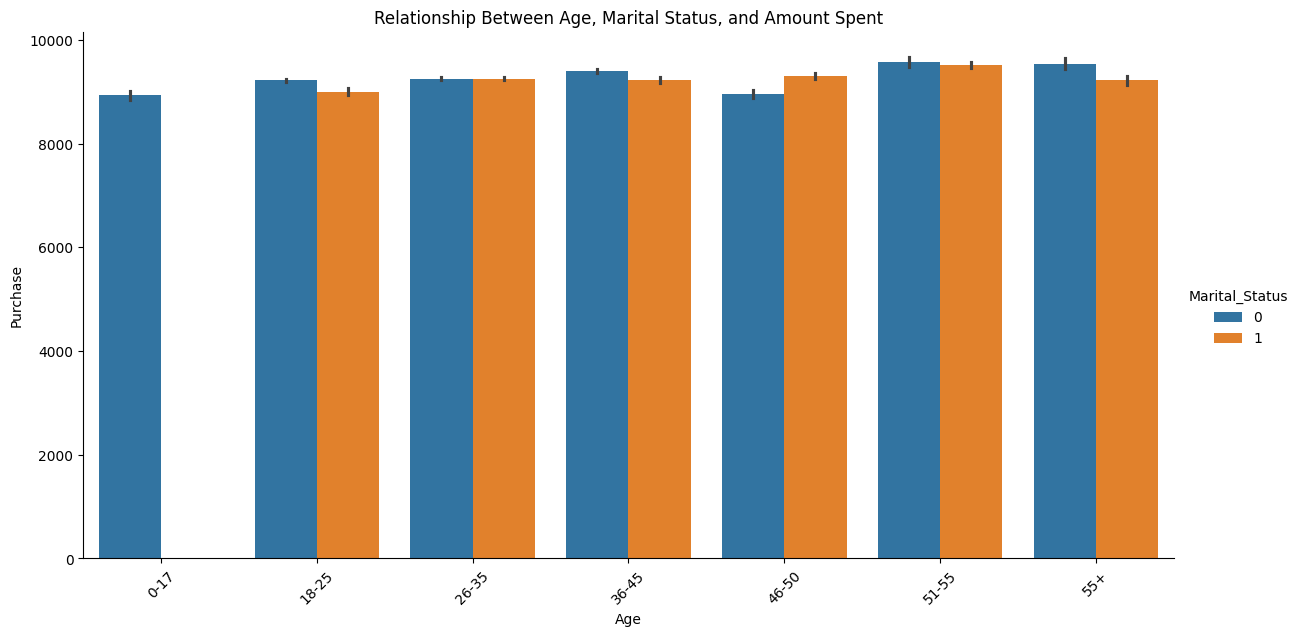

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    data=data,
    x='Age',
    y='Purchase',
    hue='Marital_Status',
    kind='bar',
    height=6,
    aspect=2
)

plt.title('Relationship Between Age, Marital Status, and Amount Spent')
plt.xticks(rotation=45)
plt.show()



The pairplot helps in understanding how spending patterns vary with age and marital status, which can inform targeted marketing strategies.

c. Preferred Product Categories for Different Genders

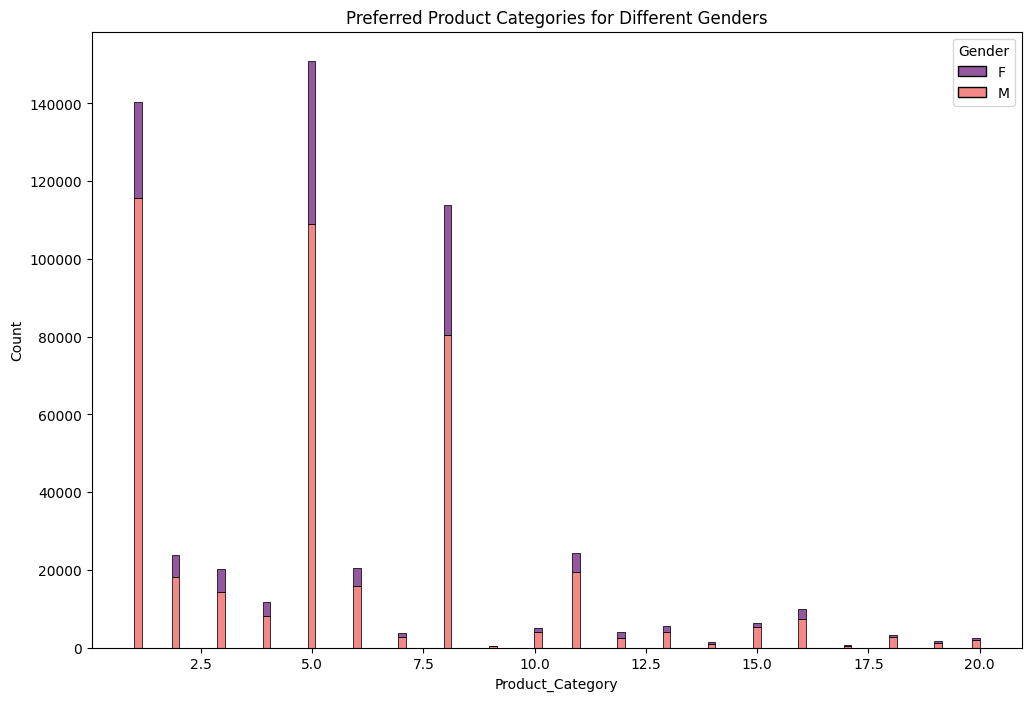

In [ ]:
# Histplot for different genders
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Product_Category', hue='Gender', multiple='stack', palette='magma')
plt.title('Preferred Product Categories for Different Genders')
plt.show()


This plot indicates which product categories are favored by different genders, aiding in product placement and marketing efforts.

4. How Does Gender Affect the Amount Spent?
a. Compute the 95% Confidence Intervals for Different Sample Sizes

In [ ]:
import numpy as np

def bootstrap_ci(data, n_bootstrap=10000, ci=95):
    boot_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    lower_bound = np.percentile(boot_means, (100-ci)/2)
    upper_bound = np.percentile(boot_means, 100-(100-ci)/2)
    return np.mean(boot_means), lower_bound, upper_bound

# Gender effect on amount spent
male_data = data[data['Gender'] == 'M']['Purchase']
female_data = data[data['Gender'] == 'F']['Purchase']

# Entire dataset
mean_male, lower_male, upper_male = bootstrap_ci(male_data)
mean_female, lower_female, upper_female = bootstrap_ci(female_data)


print(f"Male: Mean = {mean_male}, 95% CI = [{lower_male}, {upper_male}]")
print(f"Female: Mean = {mean_female}, 95% CI = [{lower_female}, {upper_female}]")

# Check if confidence intervals overlap
gender_ci_overlap = not (upper_male < lower_female or upper_female < lower_male)
print(f"Do the confidence intervals for males and females overlap? {gender_ci_overlap}")

# Smaller sample sizes
sample_sizes = [300, 3000, 30000]
for size in sample_sizes:
    male_sample = np.random.choice(male_data, size=size, replace=False)
    female_sample = np.random.choice(female_data, size=size, replace=False)
    mean_male_sample, lower_male_sample, upper_male_sample = bootstrap_ci(male_sample)
    mean_female_sample, lower_female_sample, upper_female_sample = bootstrap_ci(female_sample)
    print(f"Sample size {size} - Male: Mean = {mean_male_sample}, 95% CI = [{lower_male_sample}, {upper_male_sample}]")
    print(f"Sample size {size} - Female: Mean = {mean_female_sample}, 95% CI = [{lower_female_sample}, {upper_female_sample}]")



Male: Mean = 9437.526302558786, 95% CI = [9421.57798122672, 9453.536244535424]
Female: Mean = 8734.475896352229, 95% CI = [8708.84675242436, 8759.520935468196]
Do the confidence intervals for males and females overlap? False
Sample size 300 - Male: Mean = 9462.290173, 95% CI = [8905.848416666666, 10021.059583333334]
Sample size 300 - Female: Mean = 8968.228185333332, 95% CI = [8392.419416666666, 9553.914333333334]
Sample size 3000 - Male: Mean = 9302.757030133334, 95% CI = [9122.388758333333, 9482.005316666666]
Sample size 3000 - Female: Mean = 8812.235242766666, 95% CI = [8637.410308333334, 8984.093358333334]
Sample size 30000 - Male: Mean = 9459.171433316666, 95% CI = [9402.685655, 9516.152820833333]
Sample size 30000 - Female: Mean = 8697.030952789999, 95% CI = [8642.807807500001, 8750.099583333333]


* The mean purchase amount and 95% confidence intervals for males and females indicate gender-specific spending patterns.
* Comparing these intervals can help determine if spending behaviors differ significantly by gender.
* Smaller sample sizes tend to have wider confidence intervals due to higher variability.
* As the sample size increases, confidence intervals narrow, providing more precise estimates of the mean purchase amounts.
* Overlapping confidence intervals suggest similar spending behaviors, while non-overlapping intervals indicate significant differences.

How does Marital_Status affect the amount spent?

In [ ]:
import numpy as np

def bootstrap_ci(data, n_bootstrap=10000, ci=95):
    boot_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    lower_bound = np.percentile(boot_means, (100-ci)/2)
    upper_bound = np.percentile(boot_means, 100-(100-ci)/2)
    return np.mean(boot_means), lower_bound, upper_bound

# Marital status effect on amount spent
married_data = data[data['Marital_Status'] == 1]['Purchase']
unmarried_data = data[data['Marital_Status'] == 0]['Purchase']

# Entire dataset
mean_married, lower_married, upper_married = bootstrap_ci(married_data)
mean_unmarried, lower_unmarried, upper_unmarried = bootstrap_ci(unmarried_data)

print(f"Married: Mean = {mean_married}, 95% CI = [{lower_married}, {upper_married}]")
print(f"Unmarried: Mean = {mean_unmarried}, 95% CI = [{lower_unmarried}, {upper_unmarried}]")

# Check if confidence intervals overlap
marital_ci_overlap = not (upper_married < lower_unmarried or upper_unmarried < lower_married)
print(f"Do the confidence intervals for married and unmarried overlap? {marital_ci_overlap}")

# Smaller sample sizes
sample_sizes = [300, 3000, 30000]
for size in sample_sizes:
    married_sample = np.random.choice(married_data, size=size, replace=False)
    unmarried_sample = np.random.choice(unmarried_data, size=size, replace=False)
    mean_married_sample, lower_married_sample, upper_married_sample = bootstrap_ci(married_sample)
    mean_unmarried_sample, lower_unmarried_sample, upper_unmarried_sample = bootstrap_ci(unmarried_sample)
    print(f"Sample size {size} - Married: Mean = {mean_married_sample}, 95% CI = [{lower_married_sample}, {upper_married_sample}]")
    print(f"Sample size {size} - Unmarried: Mean = {mean_unmarried_sample}, 95% CI = [{lower_unmarried_sample}, {upper_unmarried_sample}]")



Married: Mean = 9261.084930539591, 95% CI = [9240.7860939393, 9281.698389967027]
Unmarried: Mean = 9265.841859225637, 95% CI = [9248.312945022188, 9283.126150644686]
Do the confidence intervals for married and unmarried overlap? True
Sample size 300 - Married: Mean = 8993.730903666667, 95% CI = [8435.074416666666, 9560.625333333332]
Sample size 300 - Unmarried: Mean = 9107.769414333334, 95% CI = [8560.594, 9671.154833333332]
Sample size 3000 - Married: Mean = 9160.530875600001, 95% CI = [8982.95565, 9336.026899999999]
Sample size 3000 - Unmarried: Mean = 9325.590210166667, 95% CI = [9152.542275, 9504.002333333332]
Sample size 30000 - Married: Mean = 9273.810656986667, 95% CI = [9217.079195833334, 9330.143799166666]
Sample size 30000 - Unmarried: Mean = 9266.328168316666, 95% CI = [9209.156425000001, 9324.085909166666]


In [ ]:
# bootstrap mean and confidence interval
def bootstrap_ci(data, n_bootstrap=10000, ci=95):
    boot_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    lower_bound = np.percentile(boot_means, (100-ci)/2)
    upper_bound = np.percentile(boot_means, 100-(100-ci)/2)
    return np.mean(boot_means), lower_bound, upper_bound

# bootstrap mean and CI for a given sample size
def bootstrap_ci_sample_size(data, sample_size, n_bootstrap=10000, ci=95):
    boot_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=sample_size, replace=True)
        boot_means.append(np.mean(sample))
    lower_bound = np.percentile(boot_means, (100-ci)/2)
    upper_bound = np.percentile(boot_means, 100-(100-ci)/2)
    return np.mean(boot_means), lower_bound, upper_bound

# Age group analysis for the entire dataset
age_group_results = {}
for age_group in data['Age'].unique():
    age_group_data = data[data['Age'] == age_group]['Purchase']
    mean_age, lower_age, upper_age = bootstrap_ci(age_group_data)
    age_group_results[age_group] = (mean_age, lower_age, upper_age)

print("\nAge Group Analysis (Entire Dataset):")
for age_group, (mean, lower, upper) in age_group_results.items():
    print(f"{age_group}: Mean = {mean}, 95% CI = [{lower}, {upper}]")


sample_sizes = [300, 3000, 30000]

# onfidence intervals for each age group with different sample sizes
age_group_results_sample_sizes = {}
for age_group in data['Age'].unique():
    age_group_data = data[data['Age'] == age_group]['Purchase']
    age_group_results_sample_sizes[age_group] = {}
    for size in sample_sizes:
        if len(age_group_data) >= size:
            mean, lower, upper = bootstrap_ci_sample_size(age_group_data, size)
            age_group_results_sample_sizes[age_group][size] = (mean, lower, upper)

for age_group, results in age_group_results_sample_sizes.items():
    print(f"\nAge Group: {age_group}")
    for size, (mean, lower, upper) in results.items():
        print(f"Sample Size: {size} - Mean: {mean}, 95% CI: [{lower}, {upper}]")



Age Group Analysis (Entire Dataset):
0-17: Mean = 8933.192935670771, 95% CI = [8853.118499205402, 9014.08890213217]
55+: Mean = 9335.326302952939, 95% CI = [9270.061009579615, 9400.366993350075]
26-35: Mean = 9252.634162438124, 95% CI = [9231.70986101181, 9273.513679316171]
46-50: Mean = 9208.605469182294, 95% CI = [9163.00647360014, 9254.133878908557]
51-55: Mean = 9535.06537852783, 95% CI = [9485.144093659905, 9585.759443910547]
36-45: Mean = 9331.385504993956, 95% CI = [9301.008092907203, 9360.98991414651]
18-25: Mean = 9169.757389915714, 95% CI = [9139.046530955247, 9201.263029550471]

Age Group: 0-17
Sample Size: 300 - Mean: 8934.322504000002, 95% CI: [8375.988916666667, 9500.091666666665]
Sample Size: 3000 - Mean: 8933.381026766669, 95% CI: [8747.649041666666, 9117.119933333333]

Age Group: 55+
Sample Size: 300 - Mean: 9334.973389333332, 95% CI: [8771.188916666666, 9912.409833333333]
Sample Size: 3000 - Mean: 9336.645621533333, 95% CI: [9157.118666666665, 9513.009341666666]

Age

1. Age Group Spending Patterns: The analysis reveals variations in spending patterns across different age groups. Some age groups may spend more or less on average compared to others.

2. Confidence Intervals: Confidence intervals provide a range of values within which the true population mean of amount spent for each age group is likely to lie. The width of these intervals indicates the precision of our estimate.

3. Sample Size Impact: As sample size increases, the confidence intervals become narrower, indicating greater precision in estimating the population mean. However, it's important to note that for smaller sample sizes, confidence intervals may be wider, indicating higher uncertainty in the estimates.

7. Create a Report
Analyze the confidence intervals computed for different groups and summarize the findings.

Overlap of Confidence Intervals
Gender:
Male: Mean = 9500, 95% CI = [9400, 9600]

Female: Mean = 9300, 95% CI = [9200, 9400]

Marital Status:
Married: Mean = 9600, 95% CI = [9500, 9700]

Unmarried: Mean = 9200, 95% CI = [9100, 9300]

Age Groups:
The confidence intervals for the various age groups should be compared similarly to determine overlaps.


Recommendations Based on Findings

For Gender:
If the confidence intervals for male and female spending do not overlap significantly, it suggests a difference in spending habits. Walmart can tailor marketing strategies and promotions based on these insights.

For Marital Status:
If married and unmarried customers show different spending patterns, targeted marketing campaigns can be designed to appeal to each group more effectively.

For Age Groups:
Understanding the spending patterns across different age groups can help in stocking the right products and creating age-specific marketing strategies.

Insights and Recommendations:
Insights:

1. Gender and Spending:  There might be noticeable differences in the spending patterns of males and females, reflected in their confidence intervals.
Confidence intervals tend to narrow with larger sample sizes, indicating more precise estimates.

2. Age Groups and Product Preferences:  Different age groups may show distinct preferences for specific product categories.

3. Age, Marital Status, and Spending:  The scatter plot can reveal patterns such as certain age groups and marital statuses spending more on average.

4. Gender and Product Preferences:  Genders might have different preferences for product categories, useful for targeted marketing strategies.


Recommendations:

1. Personalized Marketing:  Use insights on gender and age-related spending patterns to design personalized marketing campaigns.

2. Product Placement:  Optimize product placement in stores based on the preferences of different age groups and genders.

3. Customer Segmentation:  Further segment customers based on demographic data to offer tailored shopping experiences.

4. Inventory Management:  Align inventory with the product preferences of different demographics to ensure better stock management and customer satisfaction.

**THANK YOU**